In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def RandomWalkPoints(n):
  lstx,lsty=[],[]
  lstx.append(0)
  lsty.append(0)
  x,y=0,0
  for i in range(n):
    rand = np.random.uniform(0,1)
    if rand<0.4:
      x += 1
    else:
      x -= 1

    rand = np.random.uniform(0,1)
    if rand<0.4:
      y += 1
    else:
      y -= 1
    
    lstx.append(x)
    lsty.append(y)
  return lstx,lsty

In [15]:
def AnimateWalk(lstx,lsty):
  tempx = []
  tempy = []
  
  xmin=np.min(lstx)
  xmax=np.max(lstx)
  ymin=np.min(lsty)
  ymax=np.max(lsty)
  for i in range(0, len(lstx)):
    tempx.append(lstx[i])
    tempy.append(lsty[i])
    plt.figure()
    plt.plot(tempx[0:i+1], tempy[0:i+1],'o-',markersize=10)
    plt.plot(tempx[i],tempy[i],'ko-',markersize=10)
    plt.xlim([xmin-1,xmax+1])
    plt.ylim([ymin-1,ymax+1])
    plt.grid()
    plt.savefig(f"frame2D_{i}.png")

In [ ]:
lstx,lsty=RandomWalkPoints(10)

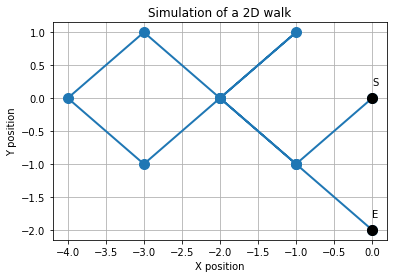

In [ ]:
plt.figure()
plt.plot(lstx,lsty,'o-',lw=2,markersize=10)
plt.plot(lstx[-1],lsty[-1],'ko-',lw=2,markersize=10)
plt.plot(lstx[0],lsty[0],'ko-',lw=2,markersize=10)
plt.annotate("S",(lstx[0],lsty[0]+0.2))
plt.annotate("E",(lstx[-1],lsty[-1]+0.2))
plt.grid()
plt.xlabel('X position')
plt.ylabel('Y position')
plt.title('Simulation of a 2D walk')
plt.savefig('2D_sim')


In [ ]:
np.sqrt(lstx[-1]**2+lsty[-1]**2)

4.47213595499958

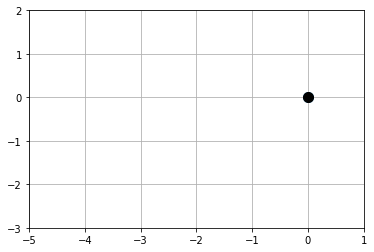

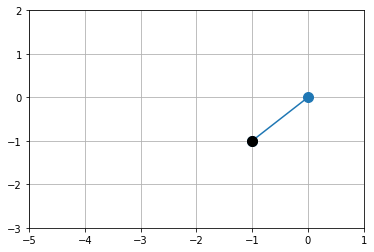

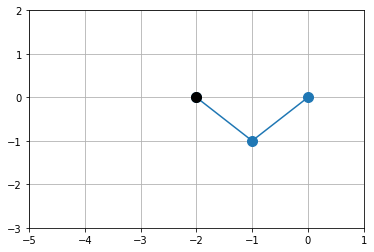

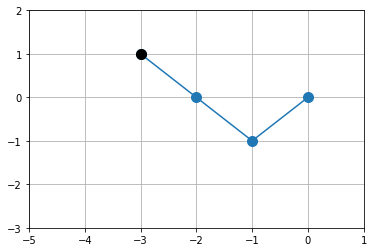

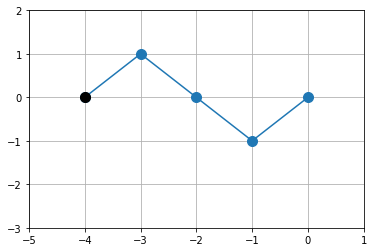

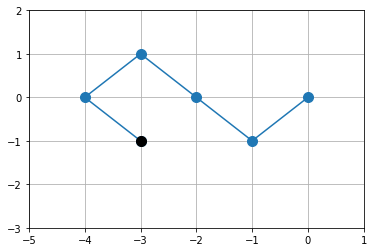

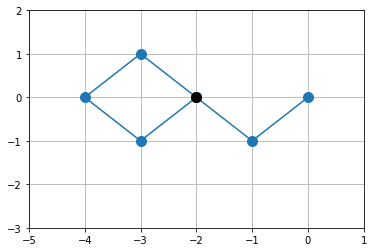

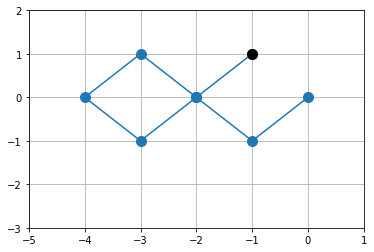

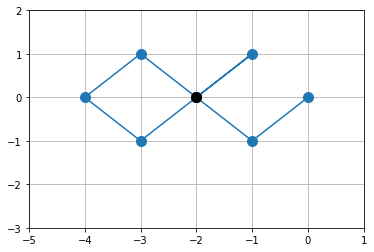

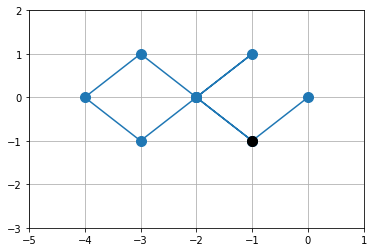

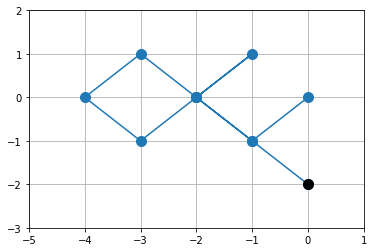

In [ ]:
AnimateWalk(lstx,lsty)

In [ ]:
def meanDist(n,sim):
  sum=0
  for _ in range(sim):
    lstx,lsty=RandomWalkPoints(n)
    sum+=np.sqrt((lstx[0]-lstx[-1])**2+(lstx[0]-lsty[-1])**2)
  
  return sum/sim

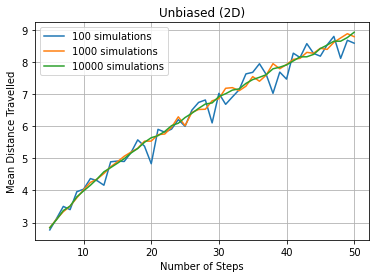

In [ ]:
n = np.arange(5, 51, 1)
sim = [10**x for x in range(2,5)]
plt.figure()
for sims in sim:
  mean=[]
  for i in n:
    mean.append(meanDist(i,sims))

  plt.plot(n, mean,label=f"{sims} simulations")

plt.grid()
plt.xlabel('Number of Steps')
plt.ylabel('Mean Distance Travelled')
plt.title('Unbiased (2D)')
plt.legend()
plt.savefig('Unbiased_mean2D.png')

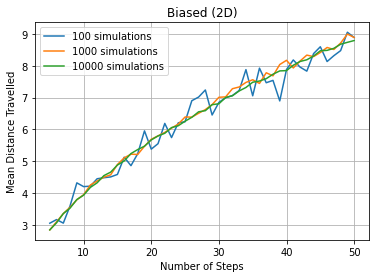

In [ ]:
n = np.arange(5, 51, 1)
sim = [10**x for x in range(2,5)]
plt.figure()
for sims in sim:
  mean=[]
  for i in n:
    mean.append(meanDist(i,sims))

  plt.plot(n, mean,label=f"{sims} simulations")

plt.grid()
plt.xlabel('Number of Steps')
plt.ylabel('Mean Distance Travelled')
plt.title('Biased (2D)')
plt.legend()
plt.savefig('Biased_mean2D.png')

In [ ]:
lst_mean

array([ 3.16227766,  4.47213595,  5.83095189,  6.32455532,  5.83095189,
        4.47213595,  3.16227766,  4.47213595,  5.09901951,  4.        ,
        5.09901951,  6.        ,  5.09901951,  4.        ,  3.16227766,
        2.        ,  3.16227766,  4.47213595,  5.09901951,  6.        ,
        7.07106781,  8.        ,  9.05538514,  8.        ,  9.05538514,
       10.        ,  9.05538514,  8.24621125,  9.05538514,  8.        ,
        7.07106781,  8.        ,  9.05538514,  8.24621125,  9.48683298,
       10.77032961, 10.29563014,  8.94427191,  8.60232527,  7.21110255,
        5.83095189,  7.21110255,  7.61577311,  8.24621125,  7.61577311,
        8.94427191])

Text(0, 0.5, 'Mean Distance')

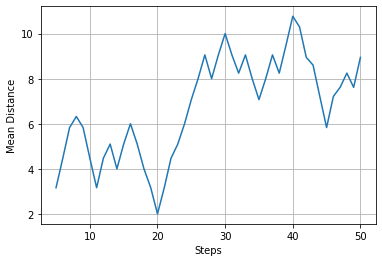

In [ ]:
plt.plot(np.arange(5,51),lst_mean)
plt.grid()
plt.xlabel('Steps')
plt.ylabel('Mean Distance')

In [ ]:
def randomWalkPoints(n):

  #np.random.seed(0)
  pointsx = []
  pointsy = []
  pointsx.append(0)
  pointsy.append(0)
  x = 0
  y = 0
  for i in range(n):
    rand = 10000*np.random.uniform(0,10)//1
    if rand%2 == 0:
      x += 1
    else:
      x -= 1

    rand = 10000*np.random.uniform(0,10)//1
    if rand%2 == 0:
      y += 1
    else:
      y -= 1

    pointsx.append(x)
    pointsy.append(y)

  return pointsx, pointsy

In [ ]:
def meanRandomWalkDistance(n, sims):
  sum = 0
  for i in range(sims):
    x,y = randomWalkPoints(n)
    dist = np.sqrt((x[0] - x[len(x)-1])**2 + (y[0] - y[len(y)-1])**2)
    sum += dist

  return sum/sims

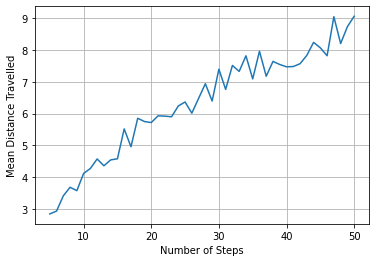

#Unbiased 1D

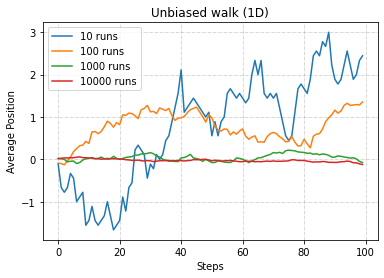

<Figure size 432x288 with 0 Axes>

In [2]:
runs = [10**x for x in range(1,5)]
steps = 100
#random.seed(seed)
for r in runs:
    net_pos = []
    for i in range(1,r):
        pos = np.zeros(steps)
        for j in range(len(pos)):
            val = np.random.uniform(0,1)
            if(val<0.5):
                val=-1
            else:
                val =1
            pos[j] = pos[j-1] + val
        net_pos.append(pos)
    net_pos = np.array(net_pos)
    pos = []
    # pos = pos/r
    for i in range(steps):
        pos.append(np.average(net_pos[:,i]))
        
    plt.grid(b = True, color ='grey',  linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    plt.xlabel('Steps')
    plt.ylabel('Average Position')
    plt.plot(pos,label=f"{r} runs")
plt.title('Unbiased walk (1D)')
plt.legend()
plt.show()
plt.savefig('Unbiased1D_ap.png')

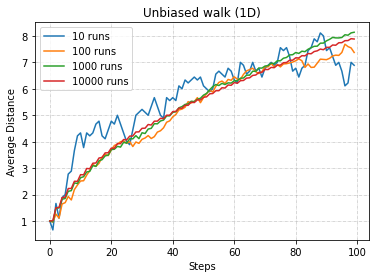

<Figure size 432x288 with 0 Axes>

In [3]:
runs = [10**x for x in range(1,5)]
steps = 100
#random.seed(seed)
for r in runs:
    net_pos = []
    for i in range(1,r):
        pos = np.zeros(steps)
        for j in range(len(pos)):
            val = np.random.uniform(0,1)
            if(val<0.5):
                val=-1
            else:
                val =1
            pos[j] = pos[j-1] + val
        net_pos.append(pos)
    net_pos = np.array(net_pos)
    pos = []
    # pos = pos/r
    for i in range(steps):
        pos.append(np.average(np.abs(net_pos[:,i])))
        
    plt.grid(b = True, color ='grey',  linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    plt.xlabel('Steps')
    plt.ylabel('Average Distance')
    plt.plot(pos,label=f"{r} runs")
plt.title('Unbiased walk (1D)')
plt.legend()
plt.show()
plt.savefig('Unbiased1D_ad.png')

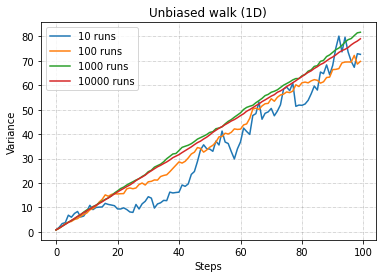

<Figure size 432x288 with 0 Axes>

In [4]:
runs = [10**x for x in range(1,5)]
steps = 100
#random.seed(seed)
for r in runs:
    net_pos = []
    for i in range(1,r):
        pos = np.zeros(steps)
        for j in range(len(pos)):
            val = np.random.uniform(0,1)
            if(val<0.5):
                val-=1
            else:
                val =1
            pos[j] = pos[j-1] + val
        net_pos.append(pos)
    net_pos = np.array(net_pos)
    var = []
    # pos = pos/r
    for i in range(steps):
        std=np.std(net_pos[:,i])
        var.append(std**2)

    plt.grid(b = True, color ='grey',  linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    plt.xlabel('Steps')
    plt.ylabel('Variance')
    plt.plot(var,label=f"{r} runs")
plt.title('Unbiased walk (1D)')
plt.legend()
plt.show()
plt.savefig('Unbiased1D_var.png')

#Biased 1D

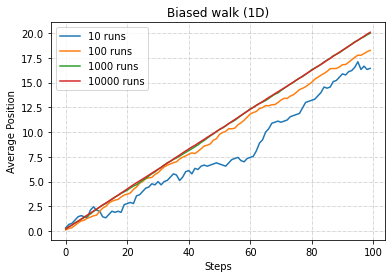

<Figure size 432x288 with 0 Axes>

In [8]:
runs = [10**x for x in range(1,5)]
steps = 100
#random.seed(seed)
for r in runs:
    net_pos = []
    for i in range(1,r):
        pos = np.zeros(steps)
        for j in range(len(pos)):
            val = np.random.uniform(0,1)
            if(val<0.4):
                val=-1
            else:
                val =1
            pos[j] = pos[j-1] + val
        net_pos.append(pos)
    net_pos = np.array(net_pos)
    pos = []
    # pos = pos/r
    for i in range(steps):
        pos.append(np.average(net_pos[:,i]))
        
    plt.grid(b = True, color ='grey',  linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    plt.xlabel('Steps')
    plt.ylabel('Average Position')
    plt.plot(pos,label=f"{r} runs")
plt.title('Biased walk (1D)')
plt.legend()
plt.show()
plt.savefig('Biased1D_ap.png')

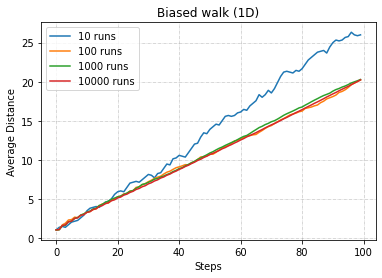

<Figure size 432x288 with 0 Axes>

In [6]:
#runs = [10**x for x in range(1,5)]
runs=1000
steps = 100
#random.seed(seed)
prob=[0.2,0.4,0.6,0.8]
for p in prob:
    net_pos = []
    for i in range(1,r):
        pos = np.zeros(steps)
        for j in range(len(pos)):
            val = np.random.uniform(0,1)
            if(val<0.4):
                val=-1
            else:
                val =1
            pos[j] = pos[j-1] + val
        net_pos.append(pos)
    net_pos = np.array(net_pos)
    pos = []
    # pos = pos/r
    for i in range(steps):
        pos.append(np.average(np.abs(net_pos[:,i])))
        
    plt.grid(b = True, color ='grey',  linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    plt.xlabel('Steps')
    plt.ylabel('Average Distance')
    plt.plot(pos,label=f"{r} runs")
plt.title('Biased walk (1D)')
plt.legend()
plt.show()
plt.savefig('Biased1D_ad.png')

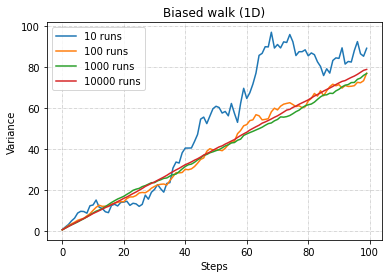

<Figure size 432x288 with 0 Axes>

In [7]:
runs = [10**x for x in range(1,5)]
steps = 100
#random.seed(seed)
for r in runs:
    net_pos = []
    for i in range(1,r):
        pos = np.zeros(steps)
        for j in range(len(pos)):
            val = np.random.uniform(0,1)
            if(val<0.4):
                val-=1
            else:
                val =1
            pos[j] = pos[j-1] + val
        net_pos.append(pos)
    net_pos = np.array(net_pos)
    var = []
    # pos = pos/r
    for i in range(steps):
        std=np.std(net_pos[:,i])
        var.append(std**2)

    plt.grid(b = True, color ='grey',  linestyle ='-.', linewidth = 0.5, alpha = 0.6)
    plt.xlabel('Steps')
    plt.ylabel('Variance')
    plt.plot(var,label=f"{r} runs")
plt.title('Biased walk (1D)')
plt.legend()
plt.show()
plt.savefig('Biased1D_var.png')

In [9]:
def morkichal(n):

  tempx = [0]
  tempy = [0]
  x = 0
  y = 0
  for i in range(n):
    rand = np.random.uniform(0,100)//1
    if rand >= 0 and rand < 2:
      y -= 1
    elif rand >=2 and rand < 5:
      y -= 1
      x -= 1
    elif rand >=5 and rand < 15:
      x -= 1
    elif rand >=15 and rand < 25:
      y -= 1
      x += 1
    elif rand >=25 and rand < 40:
      y += 1
      x -= 1
    elif rand >=40 and rand < 57:
      x += 1
    elif rand >=57 and rand < 76:
      y += 1
    elif rand >=76 and rand < 100:
      x += 1
      y += 1

    tempx.append(x)
    tempy.append(y)

  return tempx, tempy

In [11]:
def meanMorKiChalDistance(n, sims):
  sum = 0
  for i in range(sims):
    x,y = morkichal(n)
    dist = np.sqrt((x[0] - x[len(x)-1])**2 + (y[0] - y[len(y)-1])**2)
    sum += dist

  return sum/sims

In [12]:
lstx,lsty=morkichal(10)

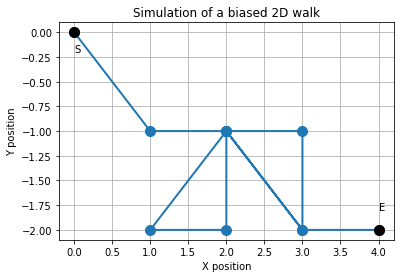

In [18]:
plt.figure()
plt.plot(lstx,lsty,'o-',lw=2,markersize=10)
plt.plot(lstx[-1],lsty[-1],'ko-',lw=2,markersize=10)
plt.plot(lstx[0],lsty[0],'ko-',lw=2,markersize=10)
plt.annotate("S",(lstx[0],lsty[0]-0.2))
plt.annotate("E",(lstx[-1],lsty[-1]+0.2))
plt.grid()
plt.xlabel('X position')
plt.ylabel('Y position')
plt.title('Simulation of a biased 2D walk')
plt.savefig('2Dspecial_sim')


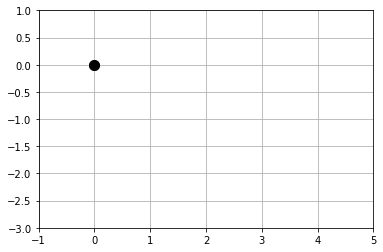

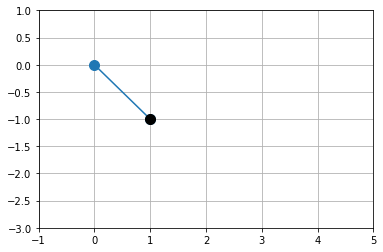

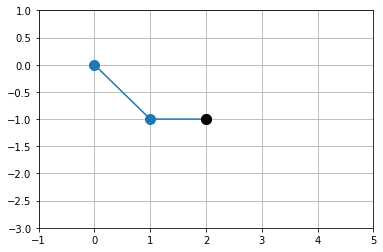

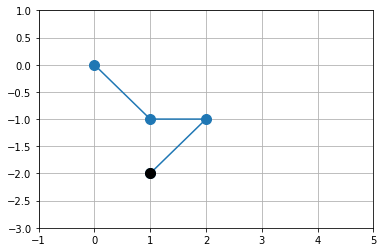

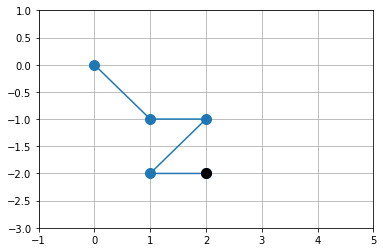

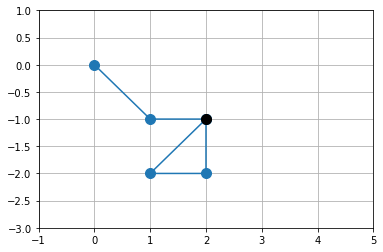

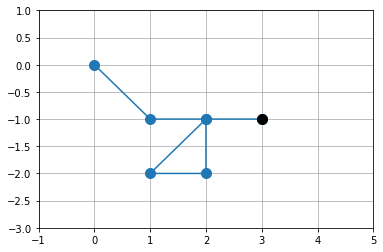

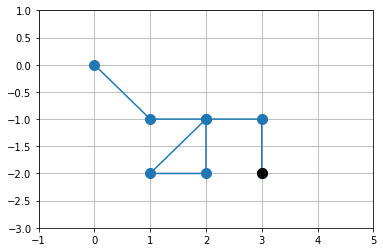

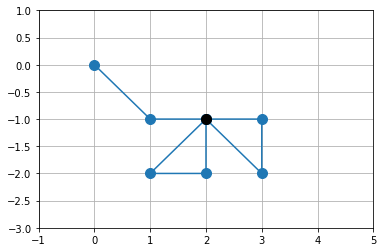

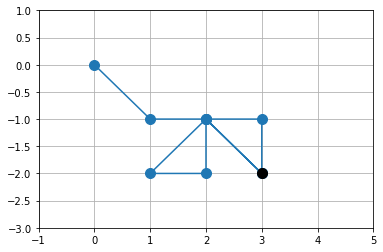

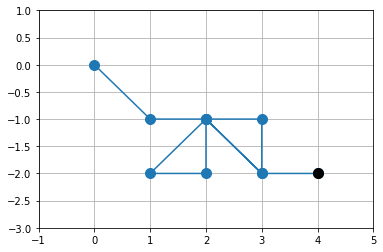

In [16]:
AnimateWalk(lstx,lsty)

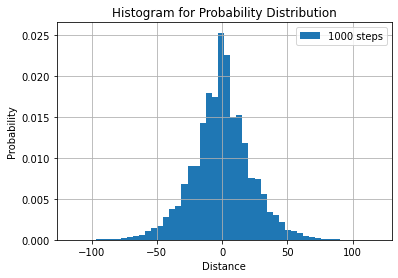

In [22]:
# q3 unbiased with 1000 runs
runs = 10000
seed = 22
steps = [1000]
#c= ['cyan','magenta']
ind = 0
for s in steps:
    net_pos = []
    for i in range(runs):
        pos = np.zeros(s)
        for j in range(len(pos)):
            val = np.random.uniform(0,1)
            if(val<0.5):
                val=-1
            else:
                val =1
            pos[j] = pos[j-1] +  val
        net_pos.append(pos)
    net_pos = np.array(net_pos)
    net_pos = net_pos.flatten()

    #plt.grid(b = True, color ='grey',  linestyle ='-.', linewidth = 0.5, alpha = 0.5)
    plt.xlabel('Distance')
    plt.ylabel('Probability')
    plt.hist(net_pos,density=True,bins=50)
    ind +=1
    plt.title('Histogram for Probability Distribution')
plt.legend(['1000 steps'])
plt.grid()
plt.show()